In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 파일 경로
file_path = 'C:/Users/dev/Documents/GitHub/kakaobootcamp/7m1w/training/build_pipeline_with_kaggle/data/Dataset salary 2024.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 'experience_level' 열 숫자형으로 변환
experience_level_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['experience_level'] = df['experience_level'].map(experience_level_mapping)

# 결측치 처리
imputer = SimpleImputer(strategy='mean')
df[['salary', 'remote_ratio']] = imputer.fit_transform(df[['salary', 'remote_ratio']])

# 이상치 탐지 및 처리
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['employment_type'] = label_encoder.fit_transform(df['employment_type'])
df['company_size'] = label_encoder.fit_transform(df['company_size'])
df['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
df['company_location'] = label_encoder.fit_transform(df['company_location'])

# 데이터 스케일링
scaler = StandardScaler()
df[['experience_level', 'salary']] = scaler.fit_transform(df[['experience_level', 'salary']])

# 파생 변수 생성
df['job_experience_ratio'] = df['experience_level'] / df['salary']

# 전처리된 데이터 저장
df.to_csv('preprocessed_data.csv', index=False)

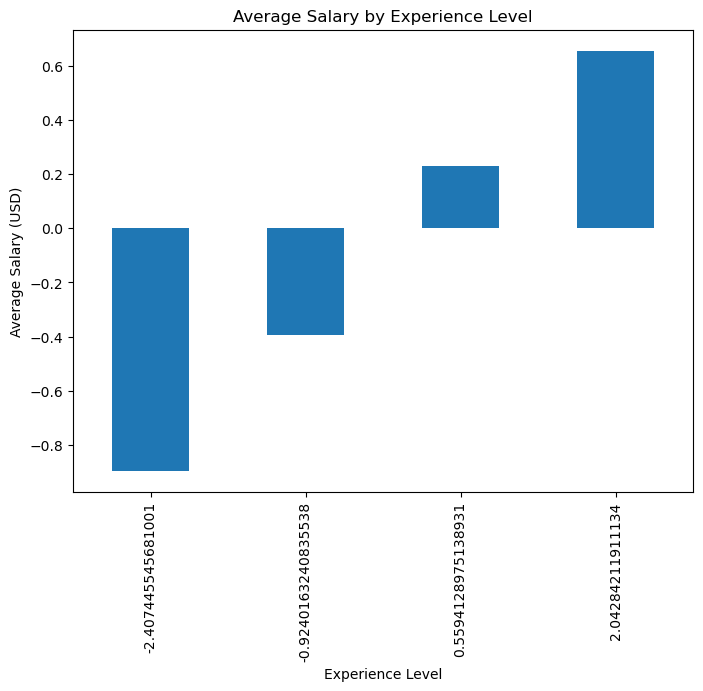

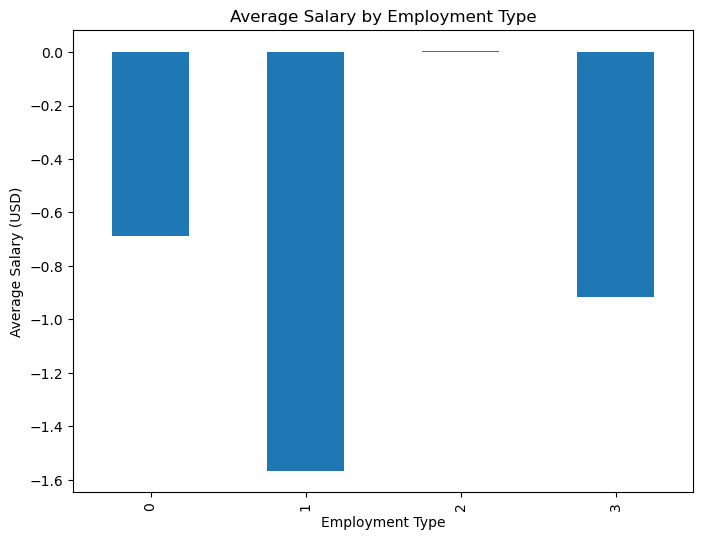

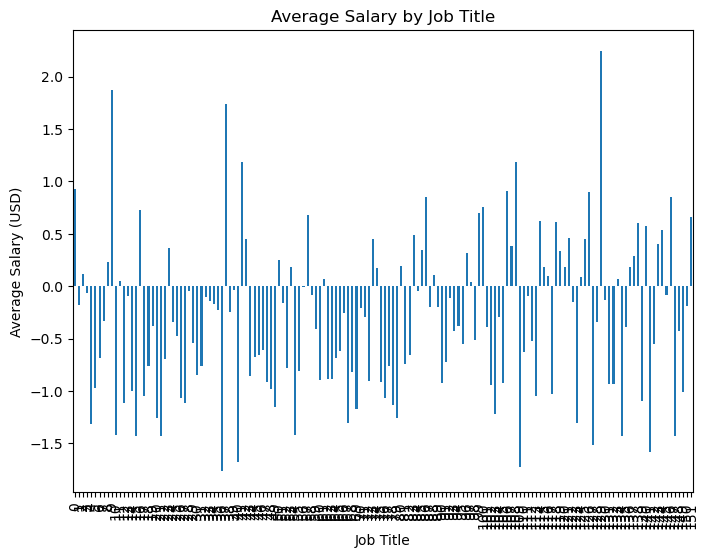

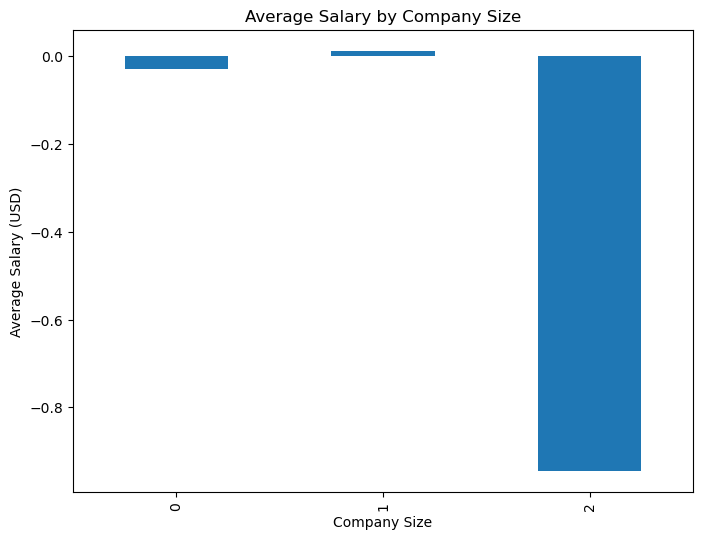

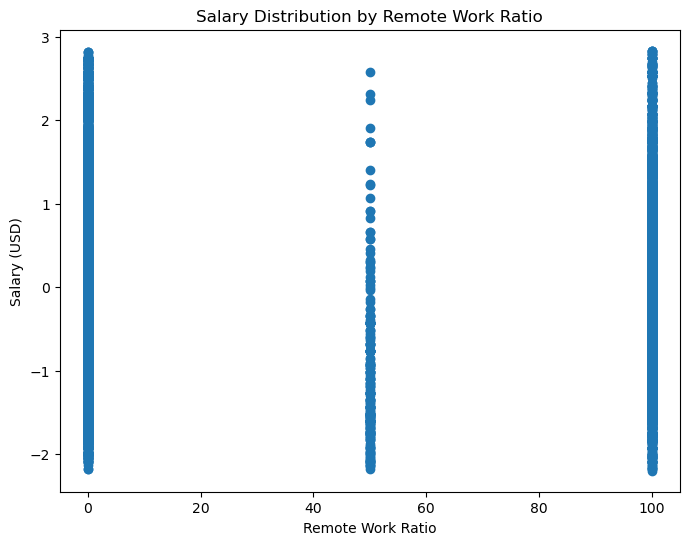

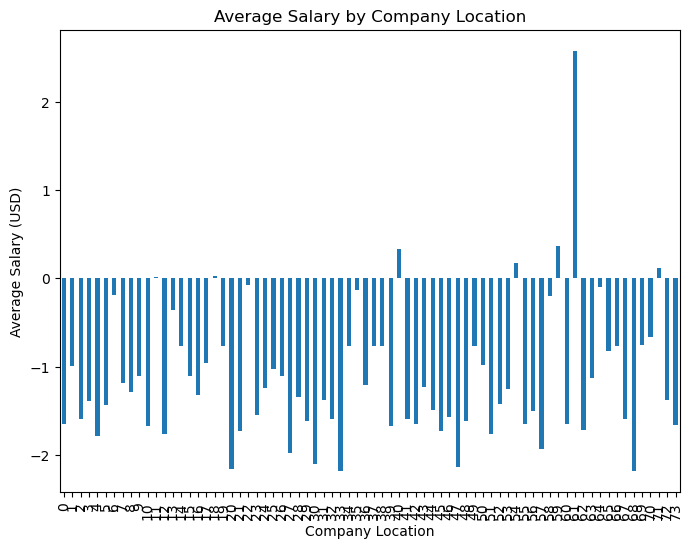

<Figure size 800x600 with 0 Axes>

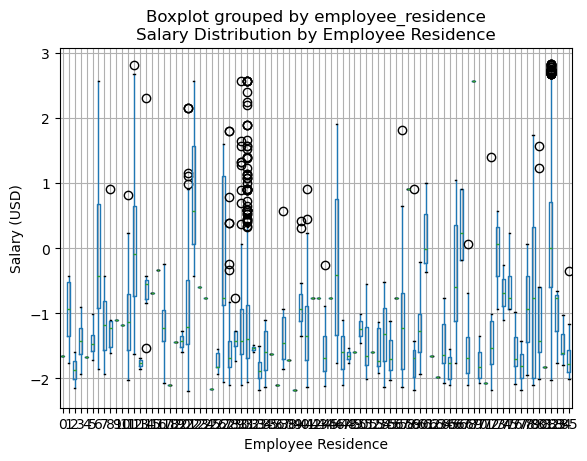

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 경로 설정
data_dir = r'C:\Users\dev\Documents\GitHub\kakaobootcamp\7m1w\training\build_pipeline_with_kaggle\data'
data_file = 'preprocessed_data.csv'

# 데이터 로드
df = pd.read_csv(os.path.join(data_dir, data_file))

# 1. 경력 수준별 평균 연봉 비교
plt.figure(figsize=(8, 6))
df.groupby('experience_level')['salary'].mean().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level')
plt.savefig(os.path.join(data_dir, 'salary_by_experience_level.png'))
plt.show()

# 2. 고용 형태별 평균 연봉 비교
plt.figure(figsize=(8, 6))
df.groupby('employment_type')['salary'].mean().plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Employment Type')
plt.savefig(os.path.join(data_dir, 'salary_by_employment_type.png'))
plt.show()

# 3. 직무별 평균 연봉 비교
plt.figure(figsize=(8, 6))
df.groupby('job_title')['salary'].mean().plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title')
plt.savefig(os.path.join(data_dir, 'salary_by_job_title.png'))
plt.show()

# 4. 회사 규모별 평균 연봉 비교
plt.figure(figsize=(8, 6))
df.groupby('company_size')['salary'].mean().plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size')
plt.savefig(os.path.join(data_dir, 'salary_by_company_size.png'))
plt.show()

# 5. 근무 형태(재택 근무 비율)에 따른 연봉 분포
plt.figure(figsize=(8, 6))
plt.scatter(df['remote_ratio'], df['salary'])
plt.xlabel('Remote Work Ratio')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Remote Work Ratio')
plt.savefig(os.path.join(data_dir, 'salary_by_remote_ratio.png'))
plt.show()

# 6. 회사 위치별 평균 연봉 비교
plt.figure(figsize=(8, 6))
df.groupby('company_location')['salary'].mean().plot(kind='bar')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Location')
plt.savefig(os.path.join(data_dir, 'salary_by_company_location.png'))
plt.show()

# 7. 국가별 연봉 분포
plt.figure(figsize=(8, 6))
df.boxplot(column='salary', by='employee_residence')
plt.xlabel('Employee Residence')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Employee Residence')
plt.savefig(os.path.join(data_dir, 'salary_by_employee_residence.png'))
plt.show()